# Visualizations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import re
import altair as alt
import matplotlib.pyplot as plt

### What is the most popular music genre according to Spotify's popularity data?

In [2]:
# read in spotify dataframe
spotifyDF = pd.read_excel("data/SpotifyFeatures.xlsx")
spotifyDF.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.91,0.0,C#,0.346,-1.828,Major,0.0525,166.969,2025-04-04 00:00:00,0.814


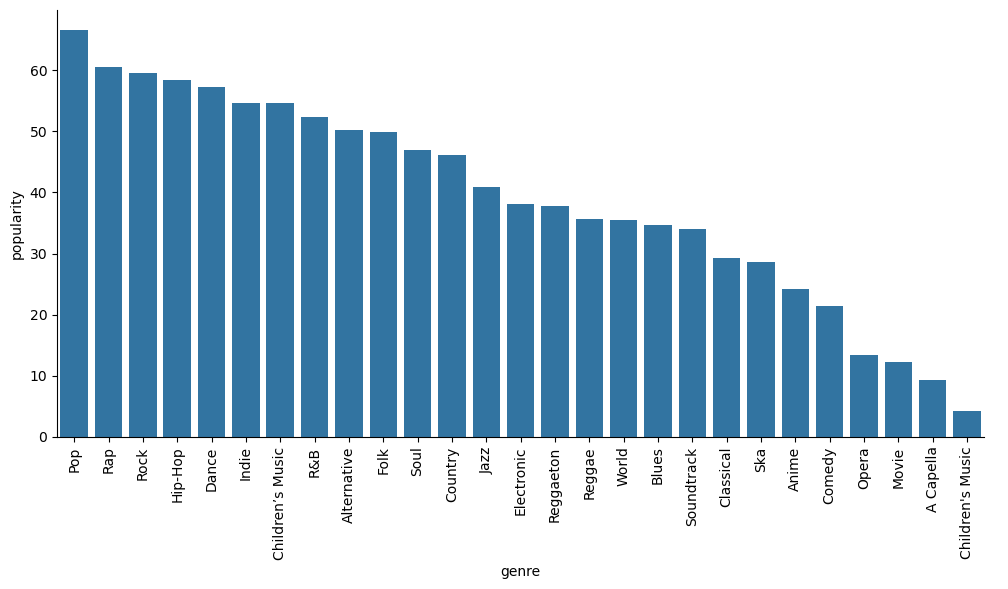

In [3]:
# create grouby to aggregate popularity based on genre
popularity = spotifyDF.groupby("genre").agg({"popularity":"mean"}).sort_values("popularity",ascending=False)
# plot the resulting df
sb.catplot(x="genre",y="popularity",data=popularity,kind="bar",aspect=2).set_xticklabels(rotation=90)
plt.savefig("music_popularity.png", dpi=300, bbox_inches='tight')


In [4]:
# read in the csv file I created
df = pd.read_csv("data/Final Movie Dataset.csv")

In [5]:
df.head(1)

,Movie Title,Gross Earnings ($),Release Date,Distributor,Year,Movie Genre,Animated/Live Action,Primary Movie Genre,Rated,imdb Rating,Soundtrack Genre,Primary Soundtrack Genre
0,Inside Out 2,652980194,Jun 14,Walt Disney Studios Motion Pictures,2024,"Animation, Adventure, Comedy",Animation,Adventure,PG,7.5,german,national


### Lets Graph all the Soundtrack Genres

In [7]:
# create grouby to group the primary soundtrack genres and count each of them up
primarySoundtrackGenres = df.groupby("Primary Soundtrack Genre").agg({"Primary Soundtrack Genre": "count"})
# create new column name since i am aggregating by the same column we are grouping by
primarySoundtrackGenres.columns = ["Count"]
# sort values by count
primarySoundtrackGenres = primarySoundtrackGenres.sort_values("Count",ascending=False)

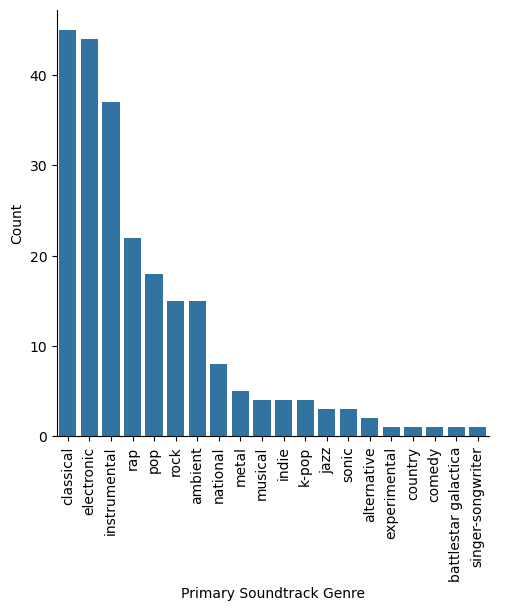

In [21]:
# do a quick bar plot to see the count of all the genres
sb.catplot(data = primarySoundtrackGenres, x = primarySoundtrackGenres.index, y = "Count", kind = "bar").set_xticklabels(rotation=90)
plt.savefig("soundtrack_genres", dpi=300, bbox_inches='tight')

### What Percent of Soundtrack Genres are Rap?

In [9]:
# divide rap count by total count
percentThatHaveRapAlbums = 22/234
# format to %
percentFormatted = "{:.2%}".format(percentThatHaveRapAlbums)

print(f"About {percentFormatted} of movies grossing over $100 million in the past 10 years have had rap soundtracks.")

About 9.40% of movies grossing over $100 million in the past 10 years have had rap soundtracks.


### Do movies with rap/hip-hop soundtracks earn more or less on average than those without?

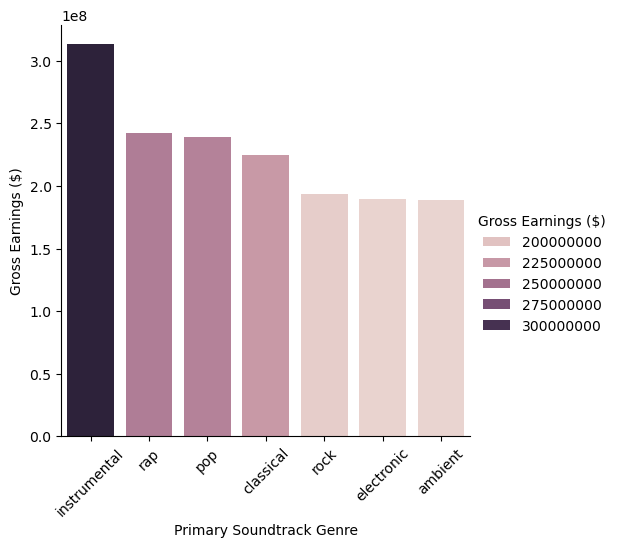

In [22]:
# group by primary soundtrack genre, aggregrate gross earnings by the average and primary soundtrack genre by count
GrossEarnings = df.groupby("Primary Soundtrack Genre").agg({"Gross Earnings ($)":"mean",
            "Primary Soundtrack Genre":"count"}).sort_values("Gross Earnings ($)",ascending=False)
# change column names
GrossEarnings.columns = ["Gross Earnings ($)","Count"]
# reset the index for graphing
GrossEarnings = GrossEarnings.reset_index()
# I aggregated by count earlier because I want to refine this dataframe to exclude the genres that have low counts
# this reduces noise and averages that may be misleading due to the low count of genres
GrossEarnings = GrossEarnings[GrossEarnings["Count"] > 10]

# use a catplot, kind = bar to plot this graph
sb.catplot(y="Gross Earnings ($)",x="Primary Soundtrack Genre",
           data=GrossEarnings,kind="bar", hue="Gross Earnings ($)").set_xticklabels(rotation=45)

plt.savefig("gross_earnings_by_genre.png", dpi=300, bbox_inches='tight')

### Do movies with rap soundtracks have higher or lower IMDb ratings than others?

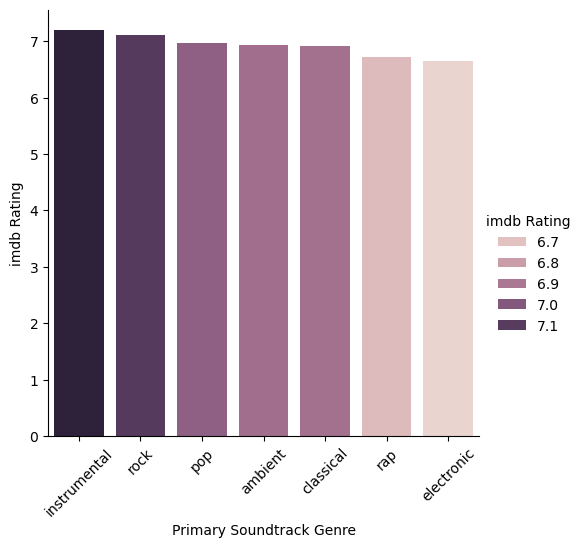

In [23]:
# group by primary soundtrack genre, aggregrate imdb rating by the average and primary soundtrack genre by count, 
imdbRating = df.groupby("Primary Soundtrack Genre").agg({"imdb Rating":"mean",
            "Primary Soundtrack Genre":"count"}).sort_values("imdb Rating",ascending=False)
# change column names
imdbRating.columns = ["imdb Rating","Count"]
# reset the index for graphing
imdbRating = imdbRating.reset_index()

# I aggregated by count earlier because I want to refine this dataframe to exclude the genres that have low counts
# this reduces noise and averages that may be misleading due to the low count of genres
imdbRating = imdbRating[imdbRating["Count"] > 10]

# catplot
sb.catplot(y="imdb Rating",x="Primary Soundtrack Genre",data=imdbRating,kind="bar",hue="imdb Rating").set_xticklabels(rotation=45)

plt.savefig("imdb_rating_by_genre.png", dpi=300, bbox_inches='tight')

### Is there a correlation between IMDb rating and gross earnings for rap soundtrack movies vs. non-rap ones?

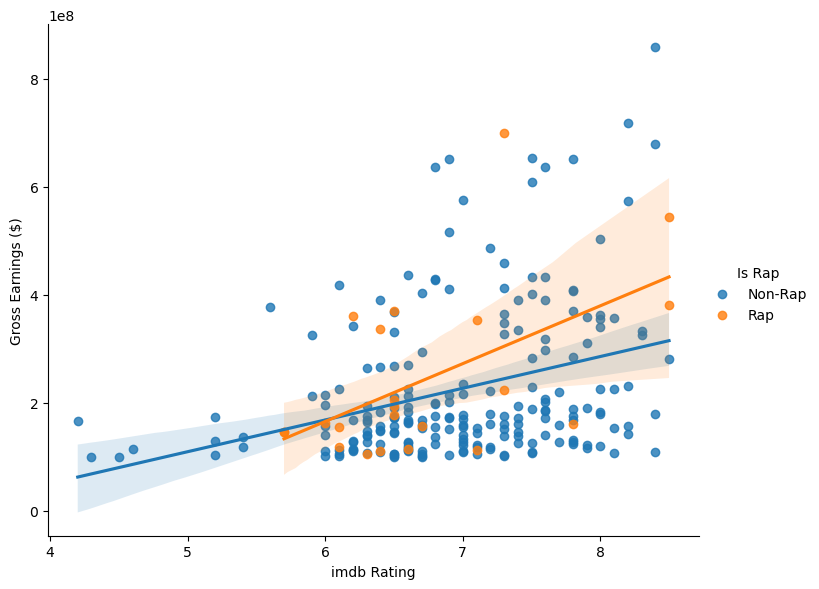

In [24]:
# create new column seperating rap and non raop
df['Is Rap'] = df['Primary Soundtrack Genre'].apply(lambda x: 'Rap' if x.lower() == 'rap' else 'Non-Rap')
# create linear model plot so we can see the regression lines from the scatter plot, this shows us the correlation
sb.lmplot(data=df, x='imdb Rating', y='Gross Earnings ($)', hue='Is Rap', height=6, aspect=1.2)
plt.savefig("gross_earnings_imdb_ratings_correl.png", dpi=300, bbox_inches='tight')

### Are rap soundtrack movies more likely to be rated R than PG or PG-13?

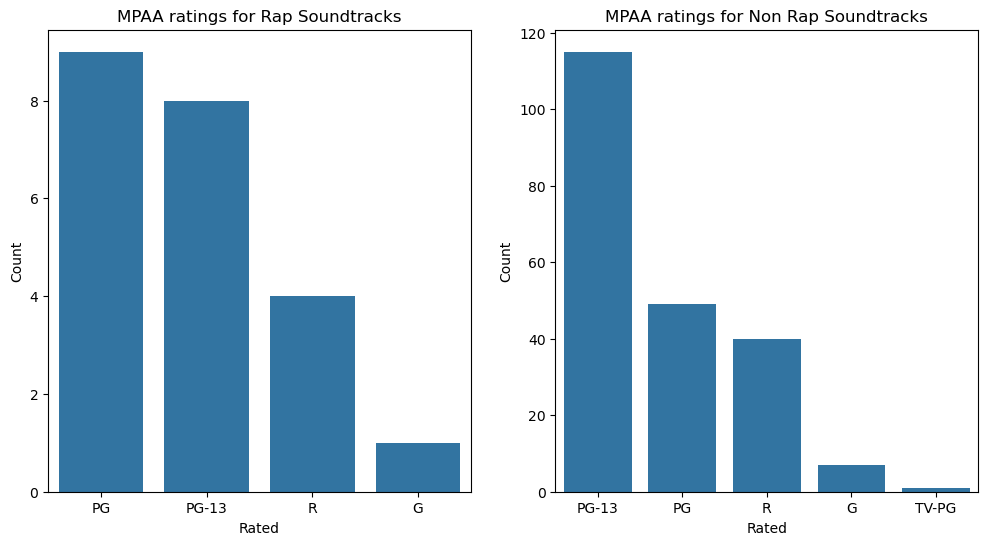

In [25]:
# create two plots side by side
# specify two axis, # of columns, we dont want them to share a y axis so sharey = false, specify fig size as well
fig,(ax1,ax2) = plt.subplots(ncols=2,sharey=False,figsize=(12,6))

# create df with only rap movies, value counts rated column
rapMovies = df[df["Is Rap"] == "Rap"]["Rated"].value_counts().reset_index()
# re name column
rapMovies.columns = ["Rated","Count"]
# create plot and specify axis 1
sb.barplot(x="Rated",y="Count",data=rapMovies,ax=ax1)
# create title
ax1.set_title("MPAA ratings for Rap Soundtracks")

# do same workflow but for non rap movies
nonRapMovies = df[df["Is Rap"] == "Non-Rap"]["Rated"].value_counts().reset_index()
nonRapMovies.columns = ["Rated","Count"]
sb.barplot(x="Rated",y="Count",data=nonRapMovies,ax=ax2)
ax2.set_title("MPAA ratings for Non Rap Soundtracks")

# save the figure
plt.savefig("mpaa_ratings.png", dpi=300, bbox_inches='tight')

### Are rap soundtrack movies released at different times of the year? What months usually? Seasons?

In [14]:
#chatGPT Request: "How to categorize the different months in my dataset into Seasons?"
# create a dictionary where the key is a regex containing options for the different seasons
seasons = {
    r"Dec\s\d*|Jan\s\d*|Feb\s\d*": "Winter",
    r"Mar\s\d*|Apr\s\d*|May\s\d*": "Spring",
    r"Jun\s\d*|Jul\s\d*|Aug\s\d*": "Summer",
    r"Sep\s\d*|Oct\s\d*|Nov\s\d*": "Fall"
}
# pass in the dictionary to a .replace method and the regex=True will look through the the release date column, look it up each Release date
# and match it to the key in the dictionary and replace it with the appropriate season
df["Season"] = df["Release Date"].replace(seasons, regex=True)

# simple lambda function with regex to just print the month
df["Month"] = df["Release Date"].apply(lambda x: re.findall(r"\w+",x)[0])

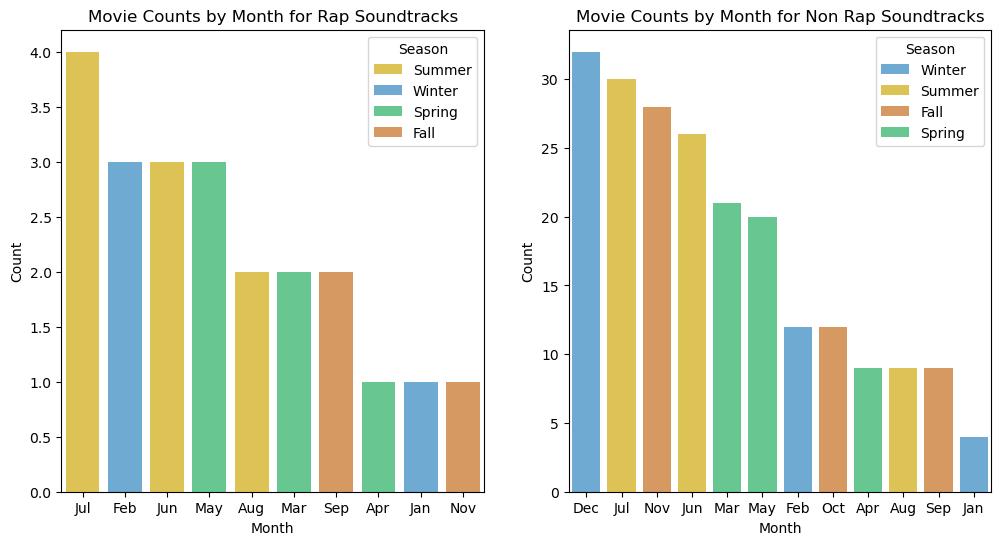

In [26]:
# create 2 side by side plots
fig,(ax1,ax2) = plt.subplots(ncols=2,sharey=False,figsize=(12, 6))

# chatGPT request: "How to make my legend/key colors consistent across two shared graphs?"
# initialize a dictionary with keys as the seasons and then a hex code specifying a specific color
palette = {
    "Winter": "#5DADE2",
    "Spring": "#58D68D",
    "Summer": "#F4D03F",
    "Fall": "#EB984E"
}

# groupby statement
RapMonths = df[df["Is Rap"] == "Rap"].groupby(["Month","Season"]).agg({"Month":"count"})
# rename column
RapMonths.columns = ["Count"]
# reset index and sort values
RapMonths = RapMonths.reset_index().sort_values("Count",ascending=False)
# pass in a dictionary to the palette parameter when creating the plot to make sure the plot has a consistent color palette for both
# bar plots
sb.barplot(x="Month",y="Count",data=RapMonths,hue="Season",palette=palette,ax=ax1)
# set title
ax1.set_title("Movie Counts by Month for Rap Soundtracks")

# same workflow but for non rap movies
NonRapMonths = df[df["Is Rap"] == "Non-Rap"].groupby(["Month","Season"]).agg({"Month":"count"})
NonRapMonths.columns = ["Count"]
NonRapMonths = NonRapMonths.reset_index().sort_values("Count",ascending=False)
sb.barplot(x="Month",y="Count",data=NonRapMonths,hue="Season",palette=palette,ax=ax2)
ax2.set_title("Movie Counts by Month for Non Rap Soundtracks")

# save the figure
plt.savefig("rap_non_rap_seasons.png", dpi=300, bbox_inches='tight')

### Are movies with rap soundtracks more often live action or animated?

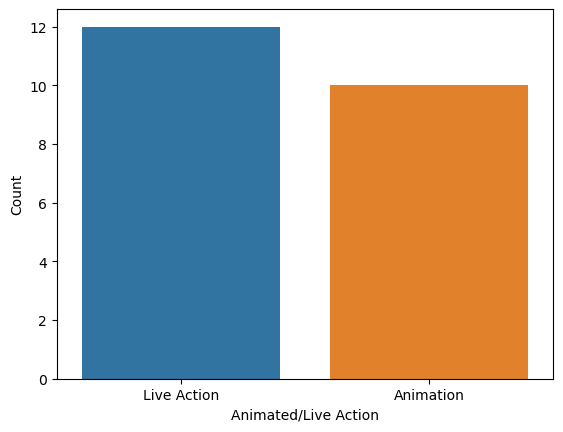

In [27]:
# only focus on rap movies, value counts on animated live action
movieType = df[df["Is Rap"] == "Rap"]["Animated/Live Action"].value_counts().reset_index()
# rename column
movieType.columns = ["Animated/Live Action", "Count"]
# plot the dataframe
sb.barplot(x="Animated/Live Action",y="Count",data=movieType,hue="Animated/Live Action")
plt.savefig("animated_vs_live_action.png", dpi=300, bbox_inches='tight')

### What are the common movie genres that have rap soundtracks?

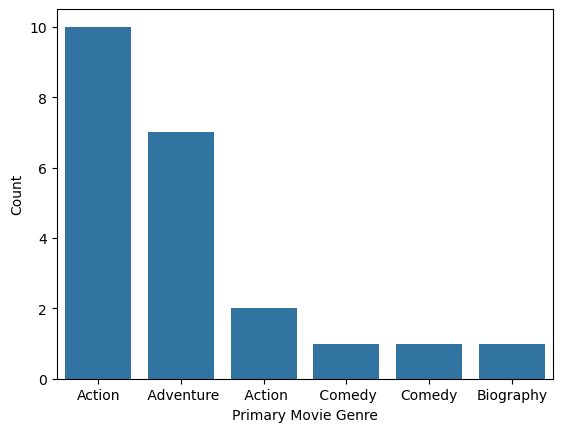

In [ ]:
# same workflow as previous question but value counts primary movie genre
movieGenre = df[df["Is Rap"] == "Rap"]["Primary Movie Genre"].value_counts().reset_index()
movieGenre.columns = ["Primary Movie Genre", "Count"]
sb.barplot(x="Primary Movie Genre",y="Count",data=movieGenre)

plt.savefig("primary_movie_genre.png", dpi=300, bbox_inches='tight')

### Is the presence of rap and the other soundtrack genres increasing over time?

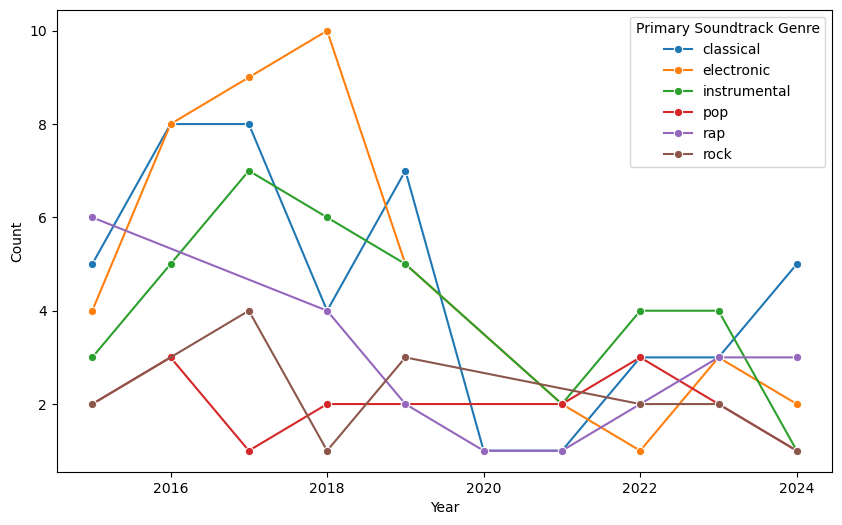

In [29]:
# filter and group
filtered = df.query("`Primary Soundtrack Genre` in ['classical','electronic','instrumental','rap','pop','rock']")
genreYear = filtered.groupby(["Primary Soundtrack Genre", "Year"]).size().reset_index(name="Count")

# make sure Year is numeric
genreYear["Year"] = pd.to_numeric(genreYear["Year"])

# plot
plt.figure(figsize=(10, 6))
sb.lineplot(x="Year", y="Count", data=genreYear, hue="Primary Soundtrack Genre",marker="o")
plt.savefig("genre_year.png", dpi=300, bbox_inches='tight')

### Do certain distributers release more movies with rap soundtracks than others?

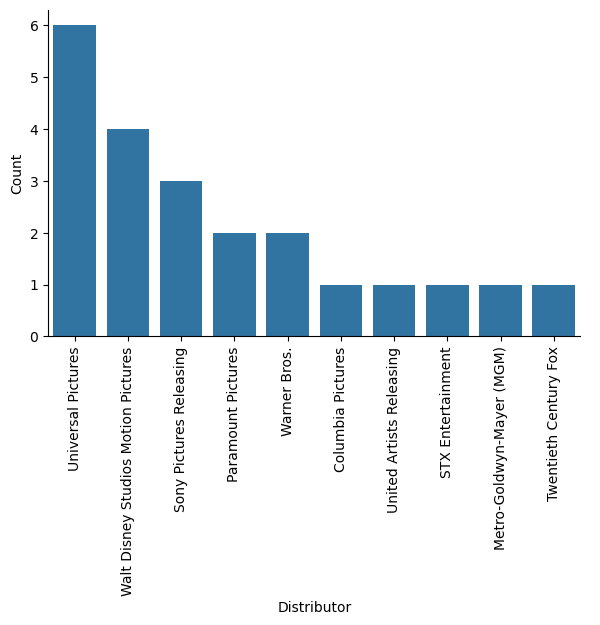

In [30]:
# narrow down df to include only rap albums, value counts distributor column to count movies with rap soundtracks
distributors = df[df["Is Rap"] == "Rap"]["Distributor"].value_counts().reset_index()
# rename columns 
distributors.columns = ["Distributor", "Count"]
# plot, set x tick labels so we can see each distributor
sb.catplot(x="Distributor",y="Count",data=distributors,kind="bar",height=4,aspect=1.5).set_xticklabels(rotation=90)
plt.savefig("distributors.png", dpi=300, bbox_inches='tight')